In [1]:
#Importing libraries
import pandas as pd
import os
import json
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import PercentFormatter

In [2]:
#Importing the generic functions created
import sys
sys.path.append('../src/utils/')
from eda import calculate_mode, plot_attribute_counts_bad_rate_count_type

In [3]:
bad_officer_appointments = pd.read_csv('../data/bad_officer_appointments.csv')
good_officer_appointments = pd.read_csv('../data/good_officer_appointments.csv')
officer_information_directory = '../data/officer_attribute_store/'

In [4]:
def extract_officer_financial_data(csv_file_path, json_directory):
    bad_officer_appointments = pd.read_csv(csv_file_path)

    unique_officer_numbers = bad_officer_appointments['officer_number'].unique()
    matched_officer_data = []

    for officer_number in unique_officer_numbers:
        json_file_path = os.path.join(json_directory, officer_number + '.json')

        if not os.path.isfile(json_file_path):
            continue

        with open(json_file_path, 'r') as file:
            json_data = json.load(file)

        if 'financials' in json_data and 'other' in json_data['financials']:
            other_financials = json_data['financials']['other']

            for company_number, financials_list in other_financials.items():
                for financial_info in financials_list:
                    trade_debtors = financial_info.get('trade_debtors')
                    total_assets = financial_info.get('total_assets')
                    trade_creditors = financial_info.get('trade_creditors')
                    current_assets = financial_info.get('current_assets')
                    current_liabilities = financial_info.get('current_liabilities')
                    turnover = financial_info.get('turnover')
                    ebitda = financial_info.get('ebitda')
                    accountant = financial_info.get('accountant')
                    solicitor = financial_info.get('solicitor')
                    jointAuditor = financial_info.get('jointAuditor')
                    auditor = financial_info.get('auditor')
                    accounts_date = financial_info.get('accounts_date')
                    publication_date = financial_info.get('publication_date')
                    
                    matched_officer_data.append((
                        officer_number,
                        company_number,
                        trade_debtors,
                        total_assets,
                        trade_creditors,
                        current_assets,
                        current_liabilities,
                        turnover,
                        ebitda,
                        accountant,
                        solicitor,
                        jointAuditor,
                        auditor,
                        accounts_date,
                        publication_date
                    ))

    return pd.DataFrame(matched_officer_data, columns=['officer_number', 'company_number', 'trade_debtors', 'total_assets', 'trade_creditors', 'current_assets', 'current_liabilities', 'turnover', 'ebitda', 'accountant', 'solicitor', 'jointAuditor', 'auditor', 'accounts_date', 'publication_date'])


In [5]:
bad_officer_financial_data = extract_officer_financial_data('../data/bad_officer_appointments.csv','../data/officer_attribute_store/')
good_officer_financial_data = extract_officer_financial_data('../data/good_officer_appointments.csv','../data/officer_attribute_store/')

In [6]:
good_officer_financial_data

,officer_number,company_number,trade_debtors,total_assets,trade_creditors,current_assets,current_liabilities,turnover,ebitda,accountant,solicitor,jointAuditor,auditor,accounts_date,publication_date
0,d697fbec8d6d9178190c161ee31cbd1263a0fcd6,03003332,NaN,1640546.0,NaN,728923.0,4000.0,NaN,NaN,None,None,None,None,2022-05-31,2023-01-19
1,d697fbec8d6d9178190c161ee31cbd1263a0fcd6,03003332,NaN,1686927.0,NaN,764482.0,11081.0,NaN,NaN,None,None,None,None,2021-05-31,2022-01-04
2,d697fbec8d6d9178190c161ee31cbd1263a0fcd6,03003332,NaN,1711074.0,NaN,767805.0,17016.0,NaN,NaN,None,None,None,None,2020-05-31,2021-04-20
3,d697fbec8d6d9178190c161ee31cbd1263a0fcd6,03003332,NaN,1223373.0,NaN,269282.0,17383.0,NaN,NaN,None,None,None,None,2019-05-31,2019-10-14
4,d697fbec8d6d9178190c161ee31cbd1263a0fcd6,03003332,NaN,658381.0,NaN,11679.0,8878.0,NaN,NaN,None,None,None,None,2018-05-31,2018-11-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563845,e503bc84d0364295be57acea99fc5d2f121058ec,01315304,NaN,57490.0,NaN,57490.0,NaN,NaN,NaN,None,None,None,None,2000-12-31,None
563846,e503bc84d0364295be57acea99fc5d2f121058ec,01315304,887000.0,2241000.0,NaN,2236000.0,2184000.0,11132000.0,NaN,None,None,None,None,1999-10-31,None
563847,e503bc84d0364295be57acea99fc5d2f121058ec,01315304,621000.0,2063000.0,NaN,2042000.0,2185000.0,12734000.0,NaN,None,None,None,None,1998-10-31,None
563848,e503bc84d0364295be57acea99fc5d2f121058ec,01315304,567000.0,2429000.0,NaN,2377000.0,2321000.0,15748000.0,NaN,None,None,None,None,1997-10-31,None


In [7]:
def windsorize_and_divide(df):
    lower_percentile = 0.01
    upper_percentile = 0.99

    lower_threshold = df['total_assets'].quantile(lower_percentile)
    upper_threshold = df['total_assets'].quantile(upper_percentile)
    df_windsorized = df[
        (df['total_assets'] >= lower_threshold) & (df['total_assets'] <= upper_threshold)
    ].copy()
    
    columns_to_divide = [col for col in df_windsorized.columns if col not in ['officer_number', 'company_number', 'solicitor', 'accountant', 'auditor', 'jointAuditor', 'total_assets', 'accounts_date', 'publication_date']]
    for col in columns_to_divide:
        df_windsorized[col + '_to_total_assets'] = df_windsorized[col] / df_windsorized['total_assets']
    
    columns_to_include = ['officer_number', 'company_number', 'solicitor', 'accountant', 'auditor', 'jointAuditor', 'total_assets', 'accounts_date', 'publication_date']
    columns_to_include += [col + '_to_total_assets' for col in columns_to_divide]
    
    return df_windsorized[columns_to_include]


In [197]:
def windsorize_and_divide(df):
    lower_percentile = 0.01
    upper_percentile = 0.99

    df_windsorized = df.copy()
    df_windsorized['total_assets'] = df_windsorized['total_assets'].clip(lower=df_windsorized['total_assets'].quantile(lower_percentile),
                                                                         upper=df_windsorized['total_assets'].quantile(upper_percentile))
    
    columns_to_divide = [col for col in df_windsorized.columns if col not in ['officer_number', 'company_number', 'solicitor', 'accountant', 'auditor', 'jointAuditor', 'total_assets', 'accounts_date', 'publication_date']]
    for col in columns_to_divide:
        df_windsorized[col + '_to_total_assets'] = df_windsorized[col] / df_windsorized['total_assets']
    
    columns_to_include = ['officer_number', 'company_number', 'solicitor', 'accountant', 'auditor', 'jointAuditor', 'total_assets', 'accounts_date', 'publication_date']
    columns_to_include += [col + '_to_total_assets' for col in columns_to_divide]
    
    return df_windsorized[columns_to_include]


In [8]:
bad_officer_financial_data['accounts_date'] = pd.to_datetime(bad_officer_financial_data['accounts_date']) 
good_officer_financial_data['accounts_date'] = pd.to_datetime(good_officer_financial_data['accounts_date']) 


In [9]:
bad_officer_financial_data_max_date = bad_officer_financial_data.groupby(['officer_number', 'company_number']).apply(lambda x: x.loc[x['accounts_date'].idxmax()])
good_officer_financial_data_max_date = good_officer_financial_data.groupby(['officer_number', 'company_number']).apply(lambda x: x.loc[x['accounts_date'].idxmax()])



In [10]:
bad_officer_financial_data_max_date.reset_index(drop=True, inplace=True)
good_officer_financial_data_max_date.reset_index(drop=True, inplace=True)


In [11]:
#Only take accounts greater than 2015
bad_officer_financial_data_max_date = bad_officer_financial_data_max_date[bad_officer_financial_data_max_date['accounts_date'] > '2015-12-31']
good_officer_financial_data_max_date = good_officer_financial_data_max_date[good_officer_financial_data_max_date['accounts_date'] > '2015-12-31']


In [13]:
has_valid_accounts_good = good_officer_financial_data_max_date[(good_officer_financial_data_max_date.current_liabilities.notna()) & 
                                     (good_officer_financial_data_max_date.trade_debtors.notna()) & 
                                     (good_officer_financial_data_max_date.trade_creditors.notna())]


In [15]:
has_valid_accounts_bad = bad_officer_financial_data_max_date[(bad_officer_financial_data_max_date.current_liabilities.notna()) & 
                                     (bad_officer_financial_data_max_date.trade_debtors.notna()) & 
                                     (bad_officer_financial_data_max_date.trade_creditors.notna())]


In [17]:
had_valid_counts_bad_windsorized = windsorize_and_divide(has_valid_accounts_bad)
had_valid_counts_good_windsorized = windsorize_and_divide(has_valid_accounts_good)

In [20]:
def plot_mean_values(bad_df, good_df):

    columns_to_plot = [col for col in bad_df.columns if col.endswith("_to_total_assets")]

    bad_means = bad_df[columns_to_plot].mean(skipna = True)
    good_means = good_df[columns_to_plot].mean(skipna = True)

    plt.figure(figsize=(10, 6))
    x = np.arange(len(columns_to_plot))
    width = 0.35

    plt.bar(x - width/2, bad_means, width, color='red', alpha=0.5, label='Bad Officers')

    plt.bar(x + width/2, good_means, width, color='green', alpha=0.5, label='Good Officers')

    plt.xticks(x, columns_to_plot, rotation=90)

    plt.ylabel('Mean Value')

    plt.title('Mean Values of Metrics')

    plt.legend()

    plt.show()

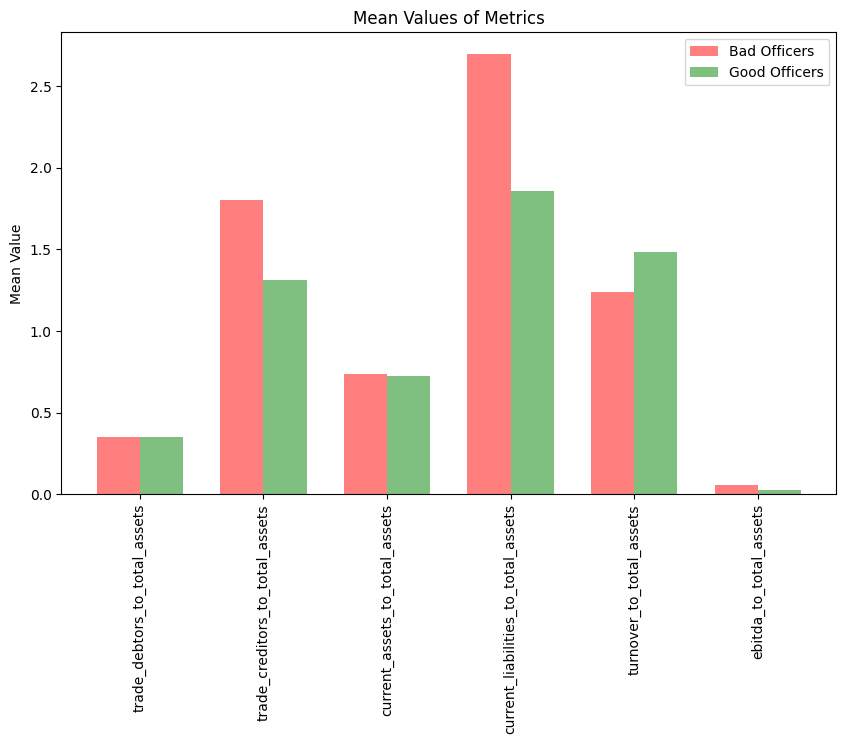

In [21]:
plot_mean_values(had_valid_counts_bad_windsorized, had_valid_counts_good_windsorized)

In [22]:
#Now, we will check the median value for these metrics
def plot_median_values(bad_df, good_df):

    columns_to_plot = [col for col in bad_df.columns if col.endswith("_to_total_assets")]

    bad_medians = bad_df[columns_to_plot].median()
    good_medians = good_df[columns_to_plot].median()

    plt.figure(figsize=(10, 6))
    x = np.arange(len(columns_to_plot))
    width = 0.35

    plt.bar(x - width/2, bad_medians, width, color='red', alpha=0.5, label='Bad Officers')

    plt.bar(x + width/2, good_medians, width, color='green', alpha=0.5, label='Good Officers')

    plt.xticks(x, columns_to_plot, rotation=90)

    plt.ylabel('Median Value')

    plt.title('Median Values of Metrics')

    plt.legend()

    plt.show()

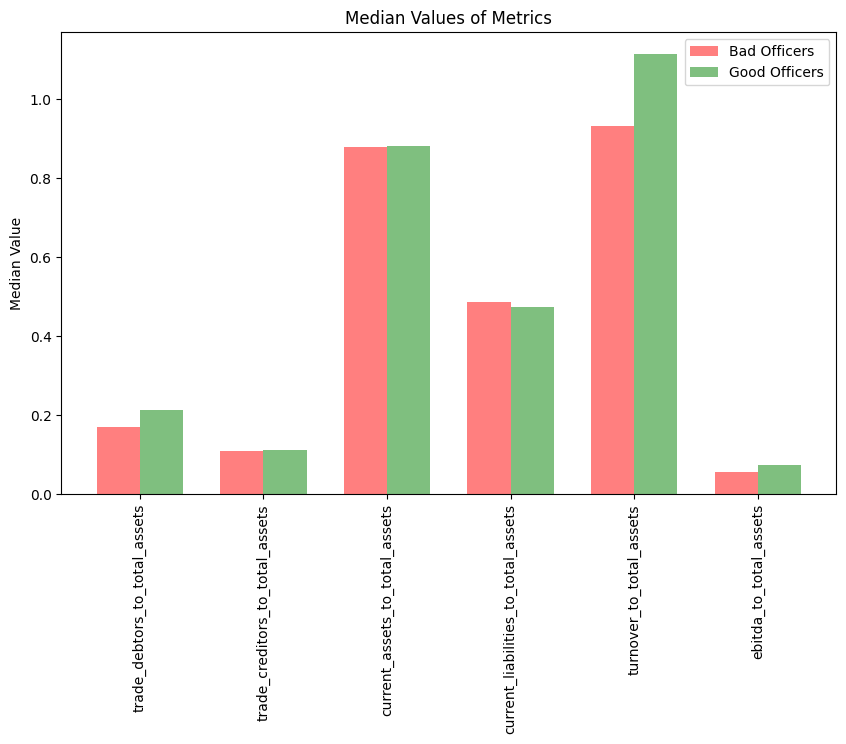

In [23]:
plot_median_values(had_valid_counts_bad_windsorized, had_valid_counts_good_windsorized)

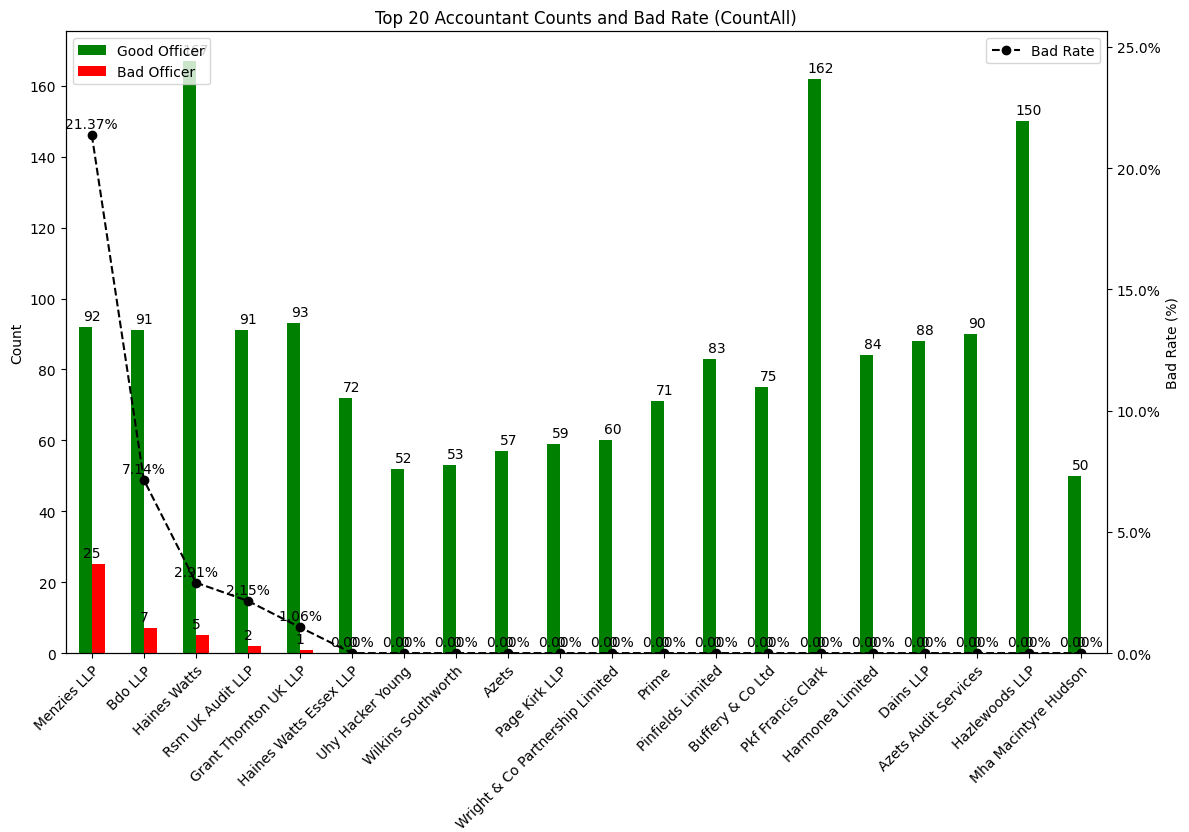

In [48]:
plot_attribute_counts_bad_rate_count_type(had_valid_counts_good_windsorized, had_valid_counts_bad_windsorized, 'accountant', count_type='count_all', top_num_values=20)


In [189]:
had_valid_counts_good_windsorized[had_valid_counts_good_windsorized['accountant']=='Menzies LLP']



,officer_number,company_number,solicitor,accountant,auditor,jointAuditor,total_assets,accounts_date,publication_date,trade_debtors_to_total_assets,trade_creditors_to_total_assets,current_assets_to_total_assets,current_liabilities_to_total_assets,turnover_to_total_assets,ebitda_to_total_assets
10256,37866294ab5936846e11eeefc83760761f3ada46,03957367,None,Menzies LLP,None,None,10406884.0,2021-12-31,2022-07-18,0.127217,0.006986,0.844622,0.486919,1.047429,0.291201
10261,37866294ab5936846e11eeefc83760761f3ada46,06206371,None,Menzies LLP,None,None,470504.0,2022-09-30,2023-03-09,0.776047,1.041711,0.992780,1.489175,NaN,NaN
10268,37866294ab5936846e11eeefc83760761f3ada46,08163038,None,Menzies LLP,None,None,1554946.0,2022-09-30,2023-03-09,0.056797,0.039531,0.228030,0.201440,NaN,NaN
10271,37866294ab5936846e11eeefc83760761f3ada46,08836936,None,Menzies LLP,None,None,497069.0,2021-12-31,2022-07-18,0.023202,0.023836,0.921574,0.057165,NaN,NaN
17961,60ad129536051d1a19750df5a3356819cc84d45f,07495020,None,Menzies LLP,None,None,422269.0,2022-07-31,2022-10-25,0.388103,0.294507,0.999443,0.498812,NaN,NaN
23921,7cc19585f63461f874e899aa738eccab8f1a1b09,05989140,None,Menzies LLP,None,None,3007180.0,2022-03-31,2022-11-28,0.127489,0.044912,0.693191,0.300999,NaN,NaN
24290,7dba315c6354c52943a52cf0ef3597dde6541af1,05505297,None,Menzies LLP,None,None,1140969.0,2021-12-31,2022-09-28,0.166937,0.080078,0.471749,0.464512,NaN,NaN
24308,7dca6deb2ca70a40f90b9508ee3f4b5fe39d7ebc,01762448,Paris Smith LLP,Menzies LLP,None,None,2783891.0,2021-12-31,2022-04-14,0.317464,0.062594,0.855383,0.531145,NaN,NaN
34164,b13f6a6c19f33f3b3745bfddf2b155d58d9a9e8b,06115331,Stone King LLP,Menzies LLP,None,None,1409190.0,2021-07-31,2022-04-08,0.646084,0.247236,0.885458,2.857907,NaN,NaN
37634,c43b43a283d936fdcede5f11f6fe919f143b9cb7,05436091,None,Menzies LLP,None,None,2327475.0,2021-12-31,2022-04-04,0.030459,0.140471,0.882398,0.198387,NaN,NaN


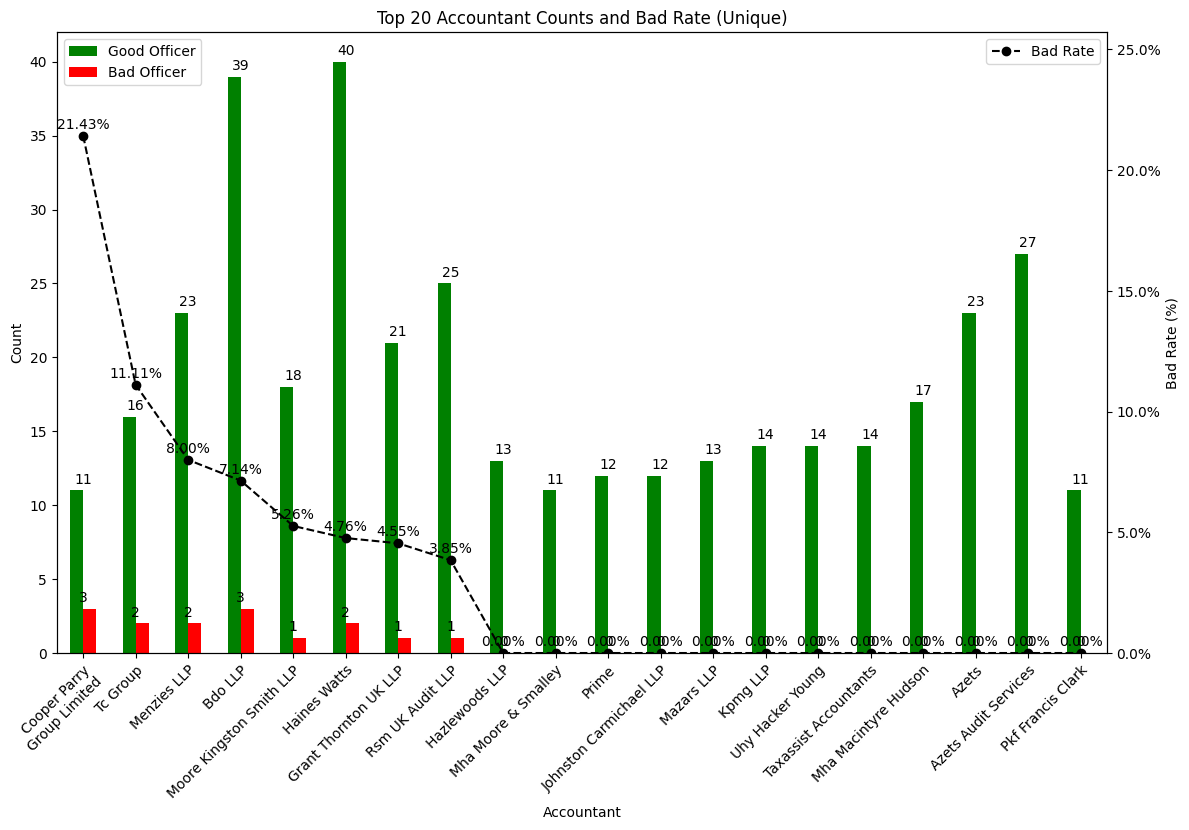

In [50]:
plot_attribute_counts_bad_rate_count_type(had_valid_counts_good_windsorized, had_valid_counts_bad_windsorized, 'accountant', count_type='unique', top_num_values=20)


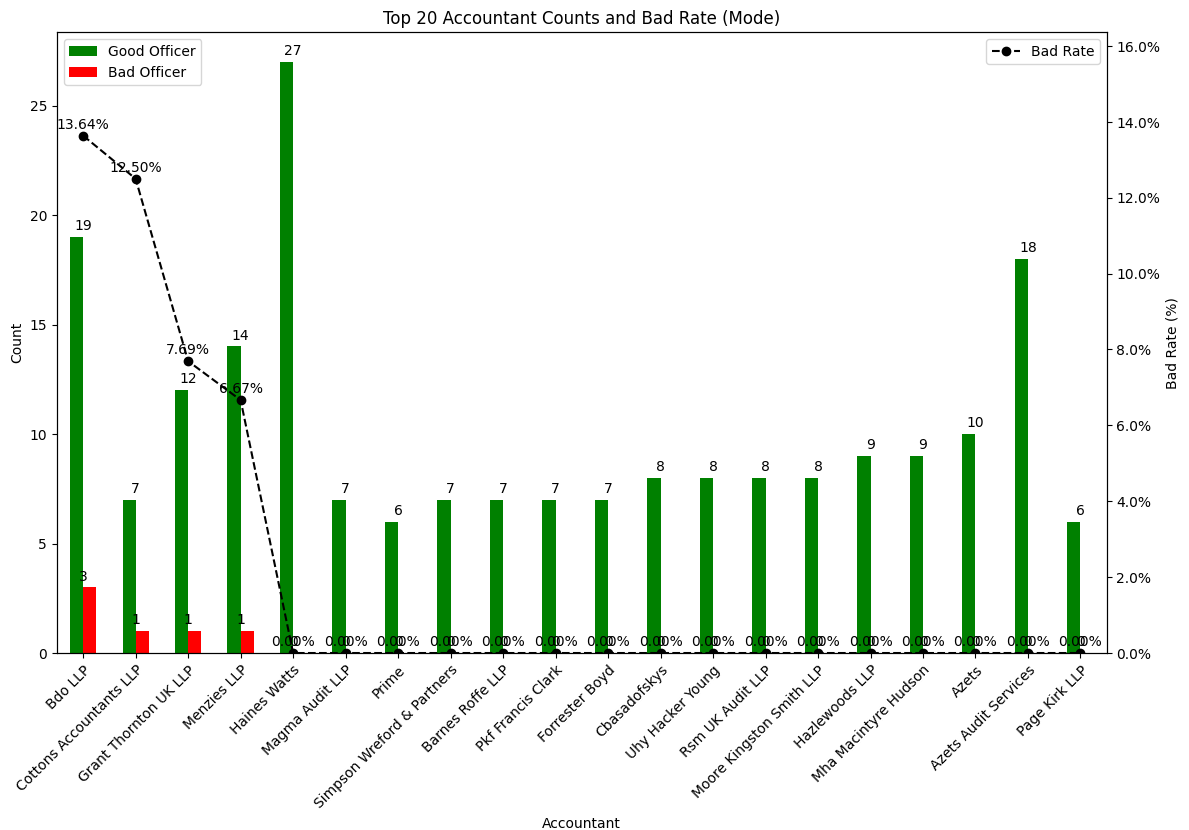

In [51]:
plot_attribute_counts_bad_rate_count_type(had_valid_counts_good_windsorized, had_valid_counts_bad_windsorized, 'accountant', count_type='mode', top_num_values=20)


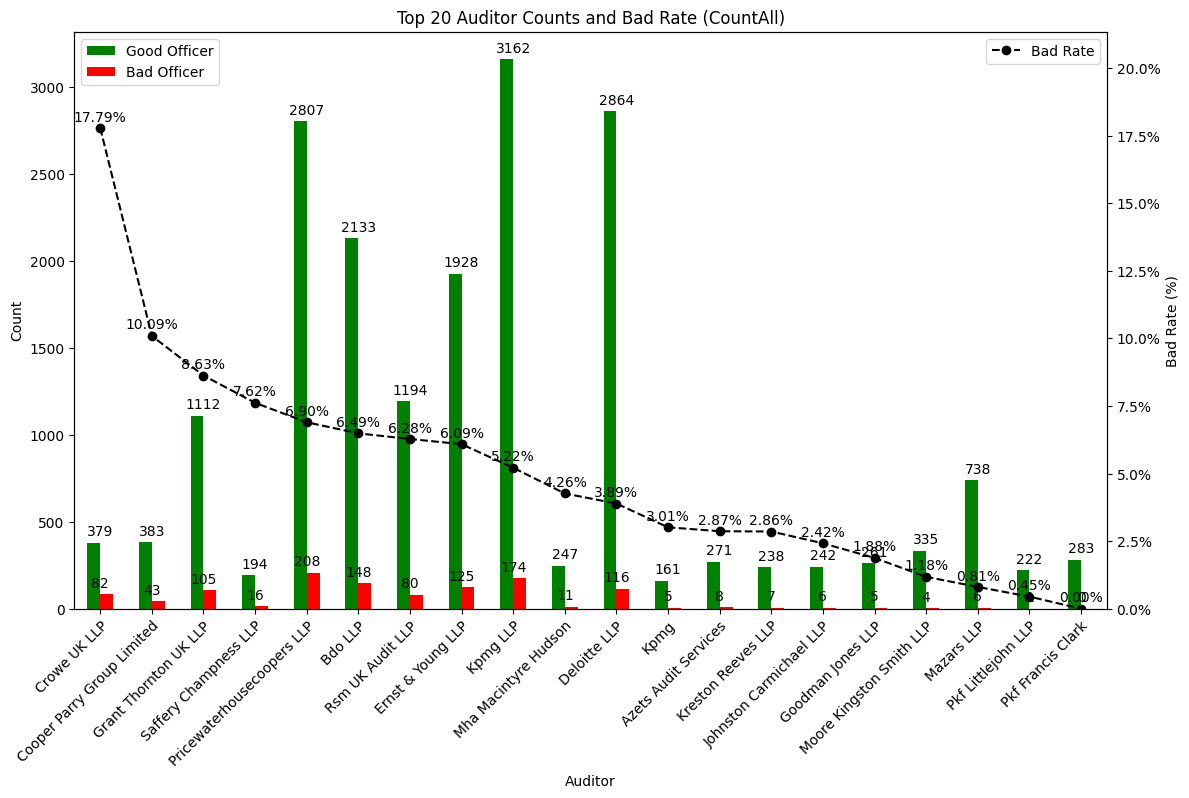

In [49]:
plot_attribute_counts_bad_rate_count_type(had_valid_counts_good_windsorized, had_valid_counts_bad_windsorized, 'auditor', count_type='count_all', top_num_values=20)


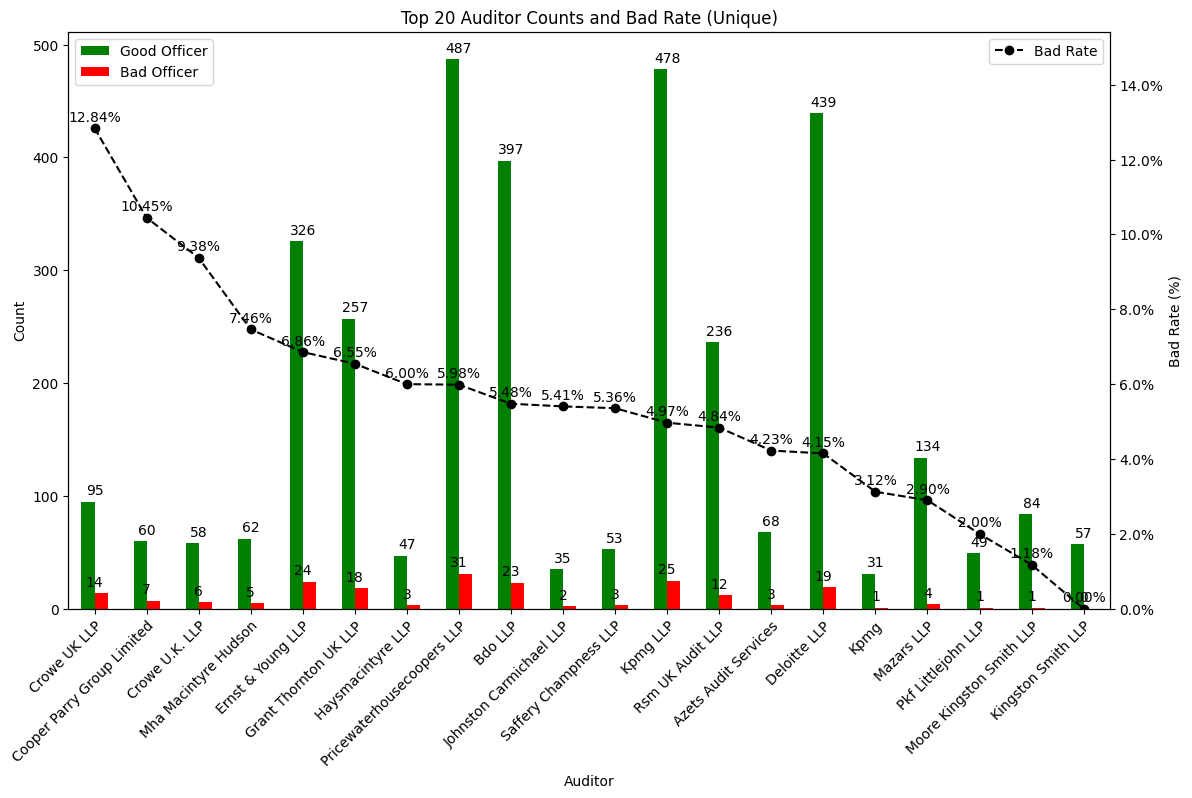

In [52]:
plot_attribute_counts_bad_rate_count_type(had_valid_counts_good_windsorized, had_valid_counts_bad_windsorized, 'auditor', count_type='unique', top_num_values=20)


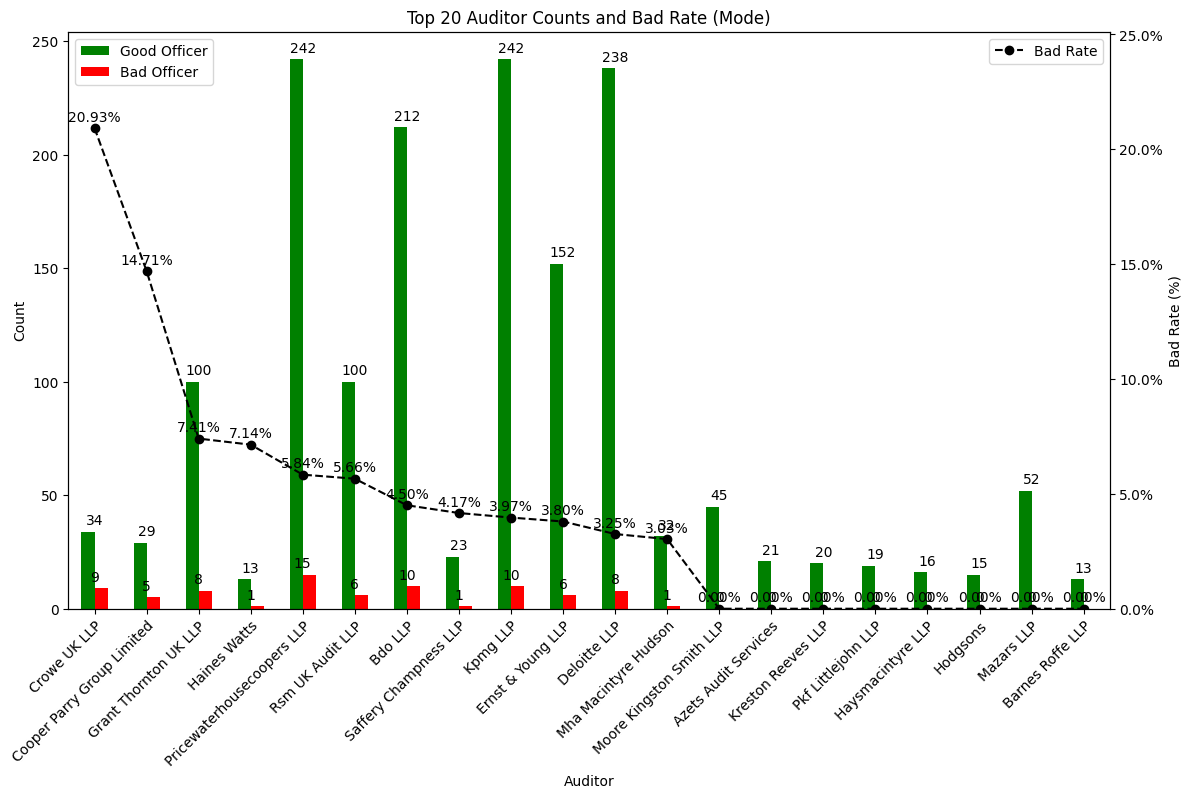

In [53]:
plot_attribute_counts_bad_rate_count_type(had_valid_counts_good_windsorized, had_valid_counts_bad_windsorized, 'auditor', count_type='mode', top_num_values=20)


In [28]:
import matplotlib.pyplot as plt

def plot_mean_values(bad_df, good_df):
    column_to_plot = 'total_assets'

    bad_mean = bad_df[column_to_plot].mean()
    good_mean = good_df[column_to_plot].mean()

    plt.figure(figsize=(10, 6))
    x = [0, 1]
    width = 0.35

    plt.bar(x[0], bad_mean, width, color='red', alpha=0.5, label='Bad Officers')
    plt.bar(x[1], good_mean, width, color='green', alpha=0.5, label='Good Officers')

    plt.xticks(x, ['Bad Officers', 'Good Officers'])
    plt.ylabel('Mean Value')
    plt.title('Mean Value of {}'.format(column_to_plot))
    plt.legend()
    plt.show()


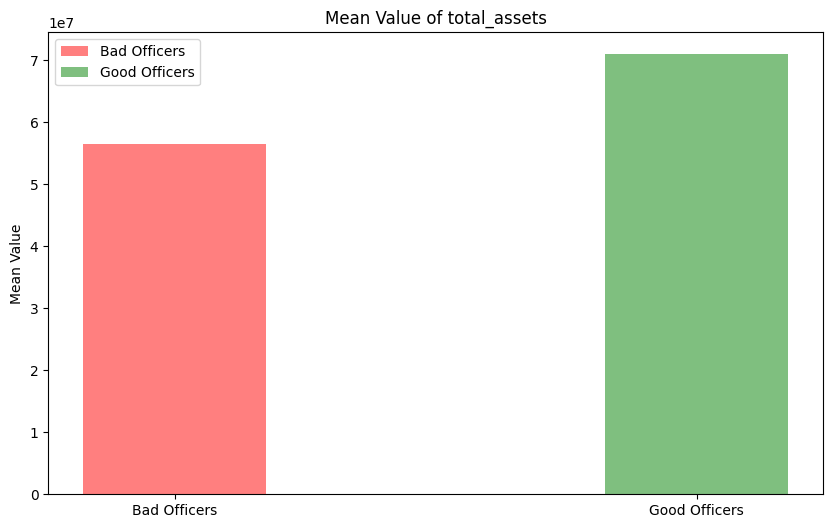

In [29]:
plot_mean_values(had_valid_counts_bad_windsorized, had_valid_counts_good_windsorized)

In [30]:
import matplotlib.pyplot as plt

def plot_median_values(bad_df, good_df):
    column_to_plot = 'total_assets'

    bad_mean = bad_df[column_to_plot].median()
    good_mean = good_df[column_to_plot].median()

    plt.figure(figsize=(10, 6))
    x = [0, 1]
    width = 0.35

    plt.bar(x[0], bad_mean, width, color='red', alpha=0.5, label='Bad Officers')
    plt.bar(x[1], good_mean, width, color='green', alpha=0.5, label='Good Officers')

    plt.xticks(x, ['Bad Officers', 'Good Officers'])
    plt.ylabel('Mean Value')
    plt.title('Mean Value of {}'.format(column_to_plot))
    plt.legend()
    plt.show()


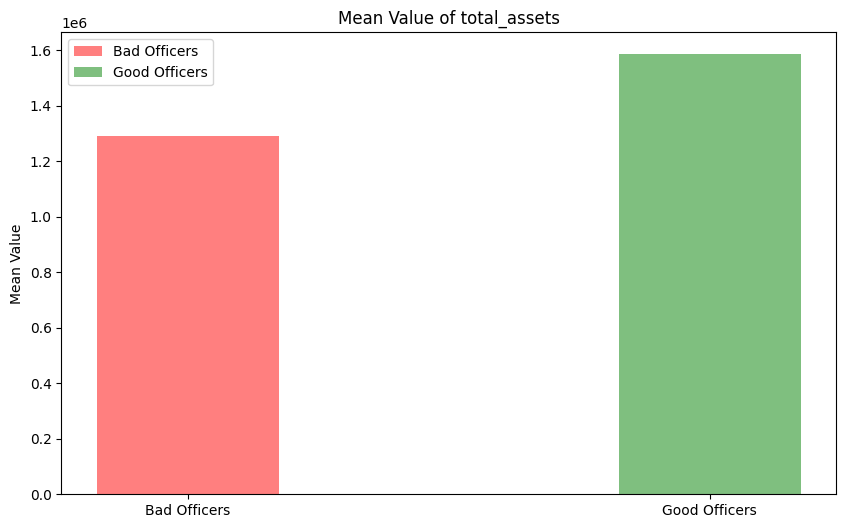

In [31]:
plot_median_values(had_valid_counts_bad_windsorized, had_valid_counts_good_windsorized)

In [32]:
#We can see that the mean and median values for total assets are higher for the good officers as oppsoed to the bad ones.
